In [17]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
from open_abf import plot_swps, get_sweeps
%matplotlib widget

In [18]:
pathToData = "/home/alan/Documents/LAB/CSHL/"
folders = glob(pathToData+"*")
files = glob(folders[0]+"/*")

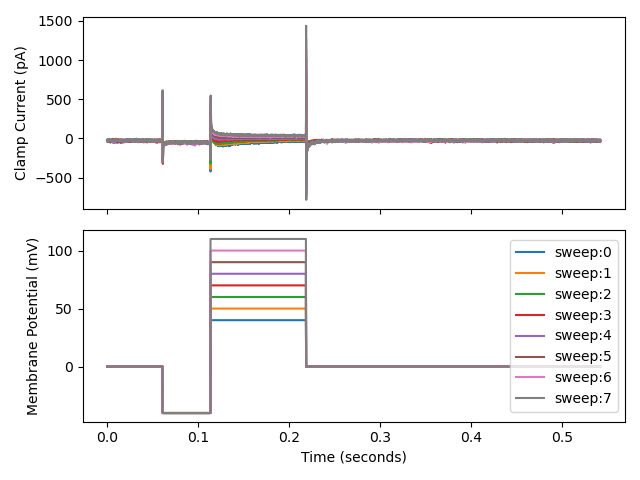

In [19]:
f = files[4]
plot_swps(f,legend=True)

In [6]:
swps, swp_time, sr = get_sweeps(f)
swps.shape

(8, 2, 5160)

In [7]:
start = 0.115 # in seconds
end = 0.13
i_start = int(start * sr)
i_end = int(end * sr)
swps[:,0,i_start:i_end]

array([[ 20.752 ,  20.752 ,  25.6348, ..., -83.0078, -82.3975, -77.5146],
       [ 26.2451,  18.3105,  14.0381, ..., -70.1904, -64.6973, -81.1768],
       [ 20.1416,  25.0244,  12.8174, ..., -48.2178, -51.2695, -48.8281],
       ...,
       [ 80.5664,  71.4111,  65.918 , ...,  14.0381,  26.2451,  28.6865],
       [112.3047, 101.9287,  95.2148, ...,  36.6211,  38.4521,  37.8418],
       [131.2256, 130.0049, 128.1738, ...,  48.2178,  50.0488,  54.9316]])

In [11]:
currents = swps[:,0,i_start:i_end]
voltages = swps[:,1,i_start:i_end]
max_currents = np.max(currents, axis=1)
mean_voltages = np.mean(voltages, axis=1)

In [12]:
max_currents

array([ 25.6348,  26.2451,  25.0244, ...,  80.5664, 112.3047, 131.2256])

In [13]:
mean_voltages

array([ 40.,  50.,  60., ...,  90., 100., 110.])

Text(0, 0.5, 'pic current (pA)')

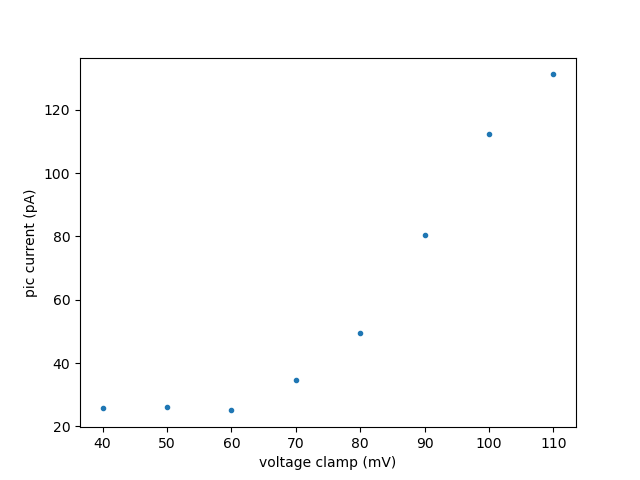

In [14]:
fig,ax = plt.subplots()
ax.plot(mean_voltages,mean_currents,'.')
ax.set_xlabel("voltage clamp (mV)")
ax.set_ylabel("pic current (pA)")

In [15]:
def swp_window(swps,start,end,sr,channel=0):
    i_start = int(start * sr)
    i_end = int(end * sr)
    return swps[:,channel,i_start:i_end]

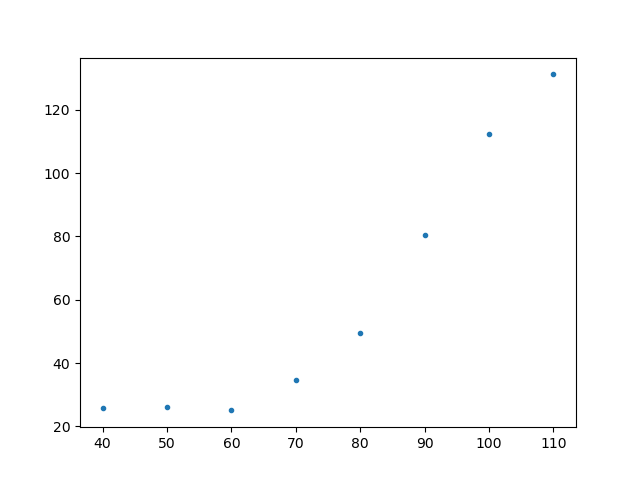

In [16]:
voltage_step = np.mean(swp_window(swps,0.12,0.2,sr,channel=1),axis=1)
current_response = np.max(swp_window(swps,0.115,0.130,sr,channel=0),axis=1)
fig,ax = plt.subplots()
ax.plot(voltage_step,current_response,'.')